# Exploratory Data Analysis - COVID19 Survival Prediction

In [2]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

import os

In [3]:
# import the data set
# data is retrieved from https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
df = pd.read_csv('C:/Users/Angela/casestudy/Capstone_Two/data/covid_data_cleaned.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3
1,2,1,0,1,1,1,72,0,0,0,0,1,0,0,1,1,0,5
2,2,1,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,3
3,2,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7
4,2,1,0,1,1,0,68,1,0,0,0,1,0,0,0,0,0,3


In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,5.007405e-01,8.092354e-01,7.337768e-02,1.335508e-01,4.179410e+01,1.191989e-01,1.436426e-02,3.010943e-02,1.351358e-02,1.551906e-01,2.674105e-02,1.980688e-02,1.524126e-01,1.802828e-02,8.046730e-02,5.305653e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,2.607556e-01,3.401692e-01,1.690739e+01,3.240226e-01,1.189871e-01,1.708885e-01,1.154598e-01,3.620865e-01,1.613257e-01,1.393362e-01,3.594205e-01,1.330537e-01,2.720154e-01,1.881165e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


The majority of feature types in the dataset are categorical except age. Summary statistics might not effectively capture the nuances. Therefore, we opt to visualize each categorical feature through count plots and compute the corresponding percentages for better understanding.

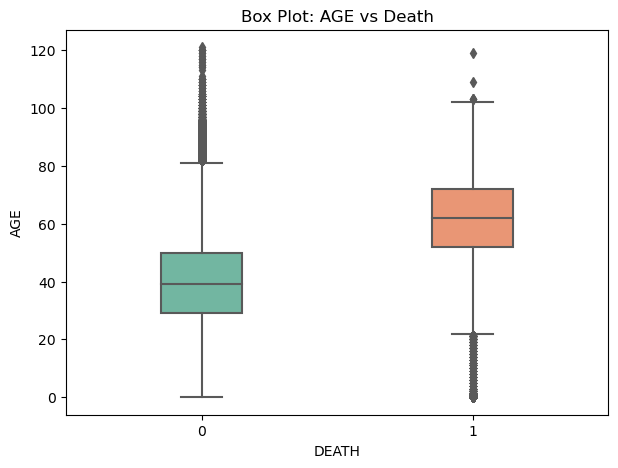

In [5]:
# visualize the relationship between age and death
plt.figure(figsize=(7, 5))
sns.boxplot(x='DEATH', y='AGE', data=df, width=0.3, palette="Set2")
plt.title('Box Plot: AGE vs Death')
plt.show()

In [6]:
# calculate the pearson correlation between column Age and column Death
correlation_coefficient, p_value = pearsonr(df['AGE'], df['DEATH'])
print(f"Pearson correlation coefficient between Age and Death: {round(correlation_coefficient, 3)}")
print(f"p-value: {p_value}")

Pearson correlation coefficient between Age and Death: 0.321
p-value: 0.0


The feature 'AGE' is skewed to the left, which may violate the assumption of normality required for a t-test. The Mann-Whitney U test is a non-parametric test that doesn't assume normality and can be used to compare the means or distributions of the continuous variable between the two groups.

In [7]:
# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(df['AGE'], df['DEATH'])

print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 1097151419556.0
P-value: 0.0


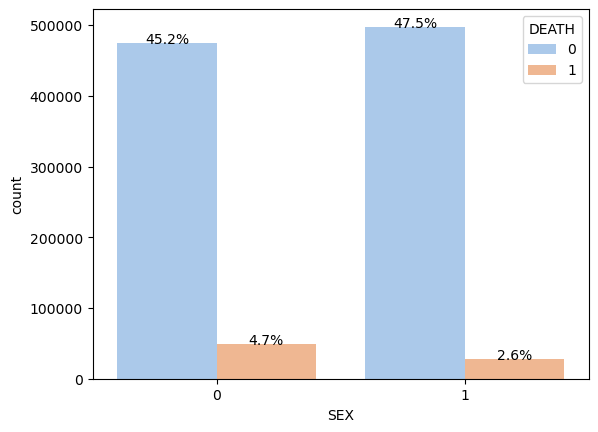

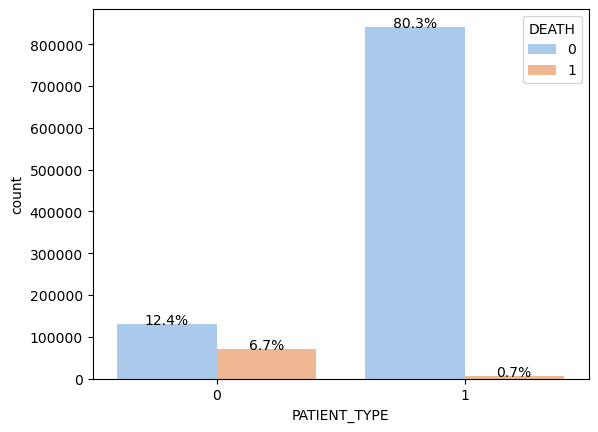

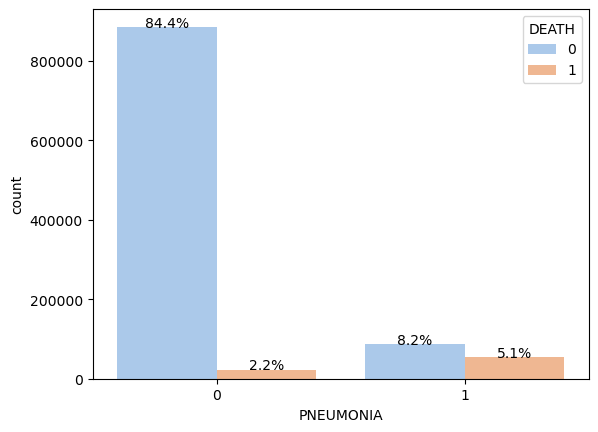

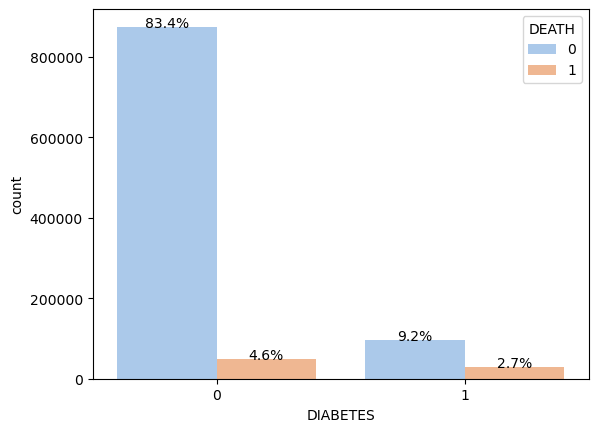

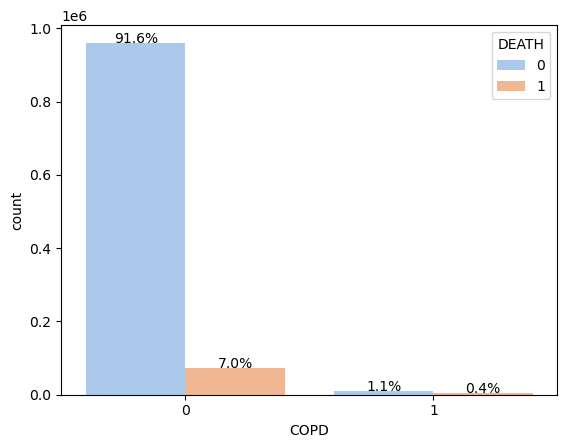

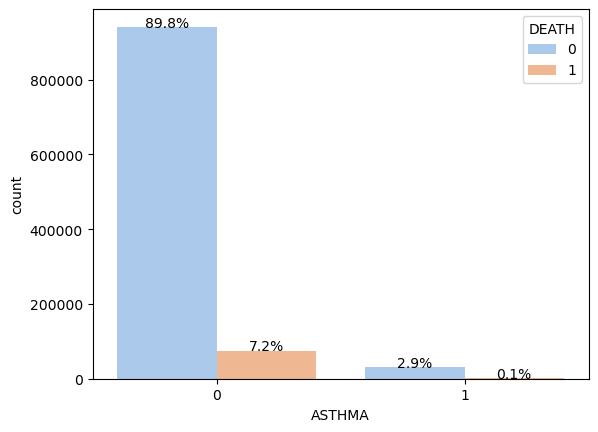

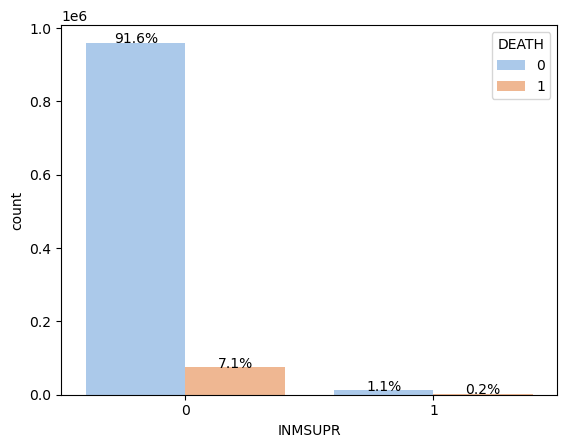

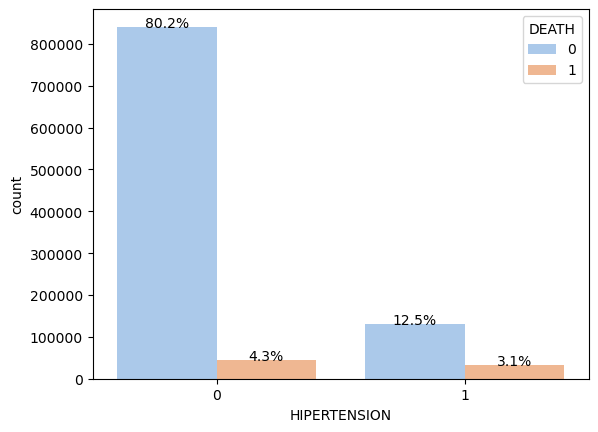

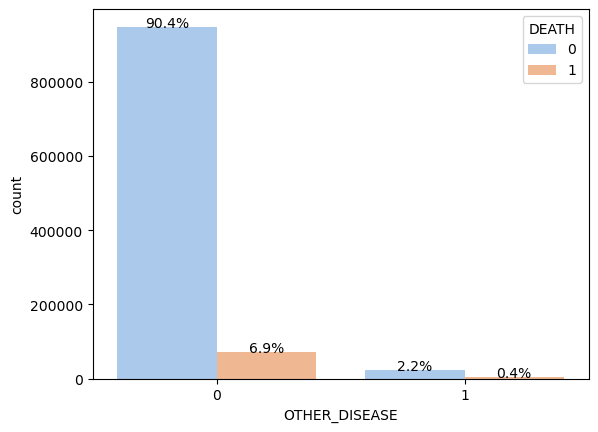

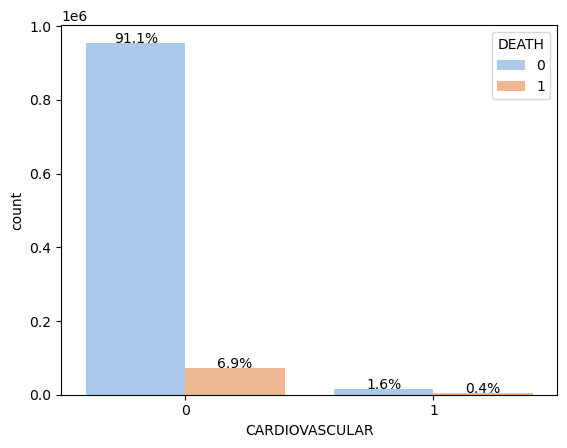

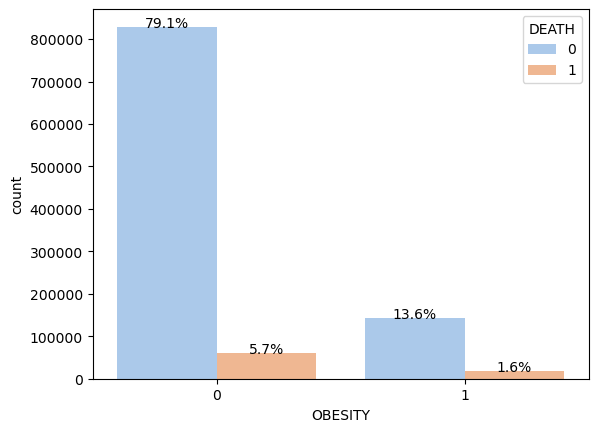

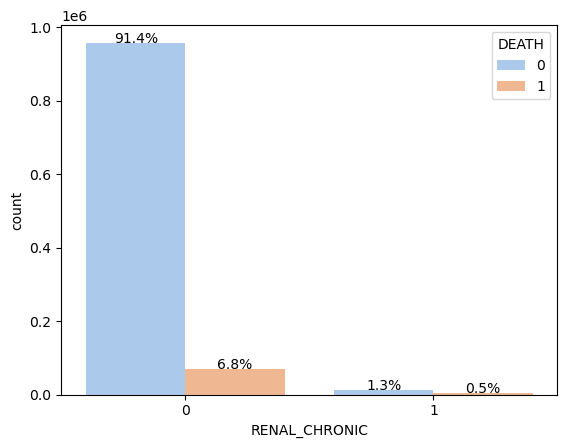

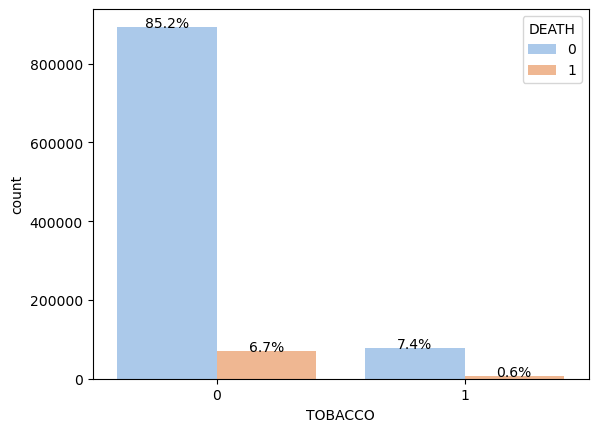

In [8]:
# create subset of columns of binary variables from dataframe
binary_columns = ['SEX', 'PATIENT_TYPE','PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                  'OTHER_DISEASE', 'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC', 'TOBACCO']

# create bar plot and calculate percentage for each binary feature
for col in binary_columns:
    sns.countplot(x=col, hue='DEATH', data=df, palette= "pastel")
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.1%}', ha='center')
    plt.show()

In [9]:
# perform chi-square test to evaluate the association between each binary variable and column Death
chi_square = {}

for col in binary_columns:
    contingency_table = pd.crosstab(df[col], df['DEATH'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square[col] = round(p, 3)

chi_square_df = pd.DataFrame(list(chi_square.items()), columns=['columns', 'p-value'])

print(chi_square_df)

           columns  p-value
0              SEX      0.0
1     PATIENT_TYPE      0.0
2        PNEUMONIA      0.0
3         DIABETES      0.0
4             COPD      0.0
5           ASTHMA      0.0
6          INMSUPR      0.0
7     HIPERTENSION      0.0
8    OTHER_DISEASE      0.0
9   CARDIOVASCULAR      0.0
10         OBESITY      0.0
11   RENAL_CHRONIC      0.0
12         TOBACCO      0.0


The chi-square test for a contingency table is a statistical test used to determine whether there is a significant association between two categorical variables. A p-value equals to 0 indicates there is a significant association between the variable and mortality.

In [10]:
# create a list of columns besides binary features and Age
other_columns = []
for col in df.columns:
    if col not in binary_columns and col != 'AGE' and col != 'DEATH':
        other_columns.append(col)

for col in other_columns:
    print(col, df[col].unique())

USMER [2 1]
MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
CLASIFFICATION_FINAL [3 5 7 6 1 2 4]


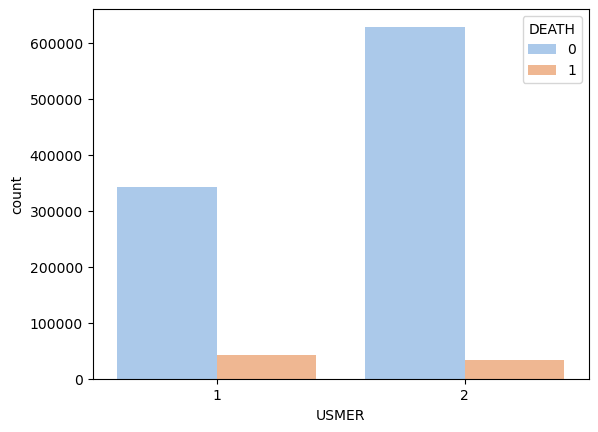

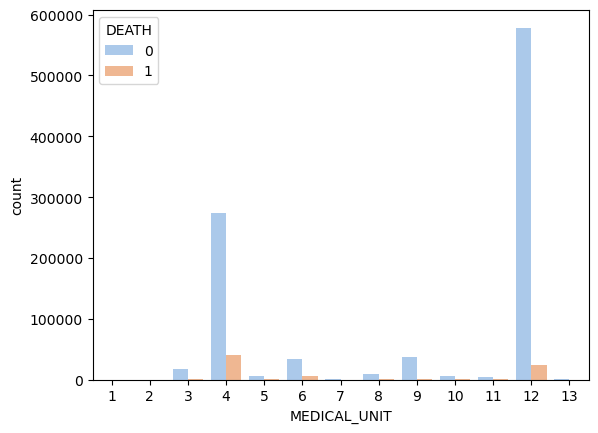

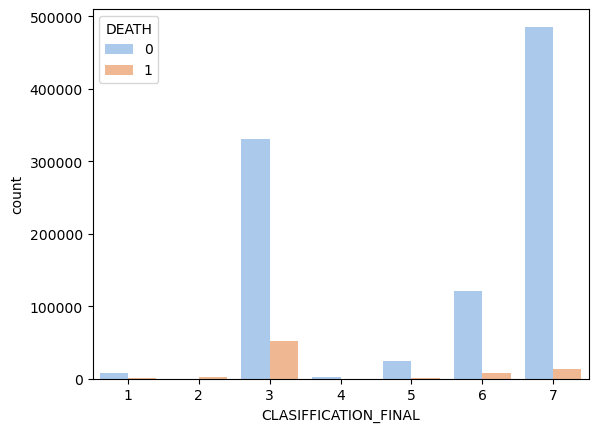

In [11]:
for col in other_columns:
    sns.countplot(x=col, hue='DEATH', data=df, palette= "pastel")
    plt.show()

In [12]:
# perform chi-square test to evaluate the association between other categorical variables and column Death

chi_square_2 = {}

for col in other_columns:
    contingency_table = pd.crosstab(df[col], df['DEATH'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_2[col] = round(p, 4)

chi_square_df_2 = pd.DataFrame(list(chi_square_2.items()), columns=['columns', 'p-value'])

print(chi_square_df_2)

                columns  p-value
0                 USMER      0.0
1          MEDICAL_UNIT      0.0
2  CLASIFFICATION_FINAL      0.0


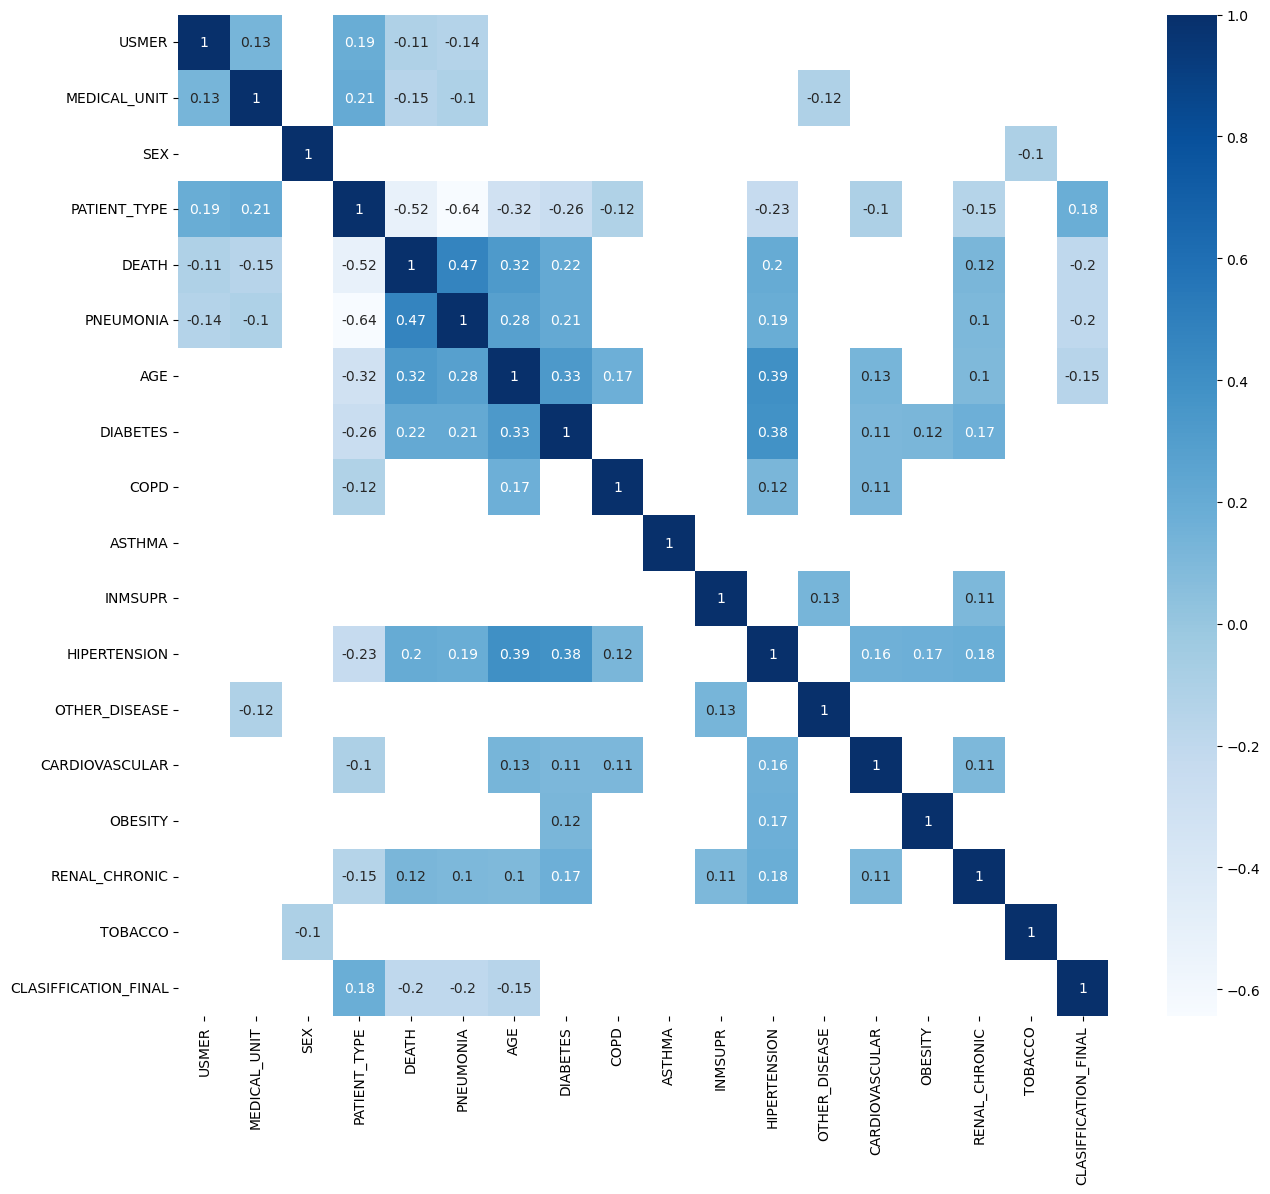

In [14]:
# create correlation matrix for features

correlation_matrix = df.corr()
plt.figure(figsize=(15,13))
p=sns.heatmap(correlation_matrix[(correlation_matrix >= 0.1) | (correlation_matrix <= -0.1)], annot=True, cmap ='Blues')

In [20]:
predictive_variable = ['DEATH']
explantory_variable = [col for col in df.columns if col is not df['DEATH']]

In [21]:
correlation_dict = []
for col in explantory_variable:
    correlation = df['DEATH'].corr(df[col])
    correlation_dict.append(correlation)

correlation_dict = pd.Series(correlation_dict, index = explantory_variable)

In [22]:
# creat a table of correlation between features and column Death

correlation = pd.DataFrame(correlation_dict, index = explantory_variable, columns = predictive_variable)
print(correlation)

                         DEATH
USMER                -0.112671
MEDICAL_UNIT         -0.149030
SEX                  -0.081383
PATIENT_TYPE         -0.515582
DEATH                 1.000000
PNEUMONIA             0.469278
AGE                   0.320801
DIABETES              0.215516
COPD                  0.089624
ASTHMA               -0.017907
INMSUPR               0.049993
HIPERTENSION          0.203231
OTHER_DISEASE         0.056416
CARDIOVASCULAR        0.076410
OBESITY               0.056649
RENAL_CHRONIC         0.118744
TOBACCO               0.005441
CLASIFFICATION_FINAL -0.196085


# Summary:
Age emerges as a crucial factor influencing COVID-19 mortality (p = 0.0). Individuals classified as 2 after testing exhibit a higher risk of death. Examining the correlation table reveals that individuals with pneumonia (correlation = 0.47) or those hospitalized ('PATIENT_TYPE', correlation = -0.51) experience an elevated likelihood of death. Conversely, tobacco use (correlation = 0.005) and asthma (correlation = 0.018) appear to be the least significant factors, suggesting they could be considered for removal if needed.